In [42]:
# 모듈 Importing 및 경고 끄기
import warnings
warnings.filterwarnings(action='ignore')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 데이터 불러오기
df_data = pd.read_csv('./train_male.csv')
df_predict = pd.read_csv('./test_male.csv')
df_data.drop(['Unnamed: 0'], axis = 1, inplace = True)
df_predict.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [3]:
# 불러온 데이터 확인
df_data

,결과,득점_득점,공격종합성공률,후위성공률,퀵오픈성공률,서브성공률,디그성공률,세트성공률,리시브성공률,블로킹성공률,...,팀명_우리카드,팀명_한국전력,팀명_현대캐피탈,상대팀_KB손해보험,상대팀_OK금융그룹,상대팀_대한항공,상대팀_삼성화재,상대팀_우리카드,상대팀_한국전력,상대팀_현대캐피탈
0,1,76,0.525862,0.382353,0.714286,0.097087,0.804348,0.517857,0.481928,0.102041,...,0,0,0,0,0,0,1,0,0,0
1,1,50,0.523810,0.470588,0.500000,0.114286,0.883721,0.479452,0.454545,0.243243,...,0,0,0,0,0,0,0,0,0,1
2,0,59,0.438095,0.458333,0.517241,0.075000,0.809524,0.413793,0.493333,0.109375,...,0,0,0,0,0,0,0,0,1,0
3,1,48,0.480519,0.529412,0.733333,0.122449,0.729730,0.492958,0.340426,0.208333,...,0,0,0,0,0,1,0,0,0,0
4,0,81,0.538462,0.620690,0.468750,0.074074,0.800000,0.486239,0.510204,0.175439,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215,0,68,0.508929,0.458333,0.583333,0.000000,0.729167,0.472441,0.562500,0.177419,...,0,0,1,0,0,0,0,1,0,0
1216,0,25,0.478261,0.375000,0.500000,0.021277,0.740741,0.454545,0.425532,0.090909,...,0,0,1,0,0,0,1,0,0,0
1217,0,62,0.475248,0.500000,0.645161,0.035714,0.629630,0.448980,0.623188,0.229167,...,0,0,1,0,0,1,0,0,0,0
1218,0,35,0.476923,0.388889,0.647059,0.025641,0.805556,0.455696,0.383333,0.107143,...,0,0,1,1,0,0,0,0,0,0


In [5]:
# 각팀 별 데이터 DF 생성
KB손해보험 = df_data[df_data['팀명_KB손해보험'] == 1]
KB손해보험 = KB손해보험.drop(columns=['팀명_KB손해보험', '팀명_OK금융그룹', '팀명_대한항공', '팀명_삼성화재', '팀명_한국전력', '팀명_현대캐피탈','팀명_우리카드','상대팀_KB손해보험'])

OK금융그룹 = df_data[df_data['팀명_OK금융그룹'] == 1]
OK금융그룹 = OK금융그룹.drop(columns=['팀명_KB손해보험', '팀명_OK금융그룹', '팀명_대한항공', '팀명_삼성화재', '팀명_한국전력', '팀명_현대캐피탈','팀명_우리카드','상대팀_OK금융그룹'])

대한항공 = df_data[df_data['팀명_대한항공'] == 1]
대한항공 = 대한항공.drop(columns=['팀명_KB손해보험', '팀명_OK금융그룹', '팀명_대한항공', '팀명_삼성화재', '팀명_한국전력', '팀명_현대캐피탈','팀명_우리카드','상대팀_대한항공'])

삼성화재 = df_data[df_data['팀명_삼성화재'] == 1]
삼성화재 = 삼성화재.drop(columns=['팀명_KB손해보험', '팀명_OK금융그룹', '팀명_대한항공', '팀명_삼성화재', '팀명_한국전력', '팀명_현대캐피탈','팀명_우리카드','상대팀_삼성화재'])

우리카드 = df_data[df_data['팀명_우리카드'] == 1]
우리카드 = 우리카드.drop(columns=['팀명_KB손해보험', '팀명_OK금융그룹', '팀명_대한항공', '팀명_삼성화재', '팀명_한국전력', '팀명_현대캐피탈','팀명_우리카드','상대팀_우리카드'])

한국전력 = df_data[df_data['팀명_한국전력'] == 1]
한국전력 = 한국전력.drop(columns=['팀명_KB손해보험', '팀명_OK금융그룹', '팀명_대한항공', '팀명_삼성화재', '팀명_한국전력', '팀명_현대캐피탈','팀명_우리카드','상대팀_한국전력'])

현대캐피탈 = df_data[df_data['팀명_현대캐피탈'] == 1]
현대캐피탈 = 현대캐피탈.drop(columns=['팀명_KB손해보험', '팀명_OK금융그룹', '팀명_대한항공', '팀명_삼성화재', '팀명_한국전력', '팀명_현대캐피탈','팀명_우리카드','상대팀_현대캐피탈'])

# 시각화

각 feature가 경기력에 미치는 영향을 heatmap으로 표현

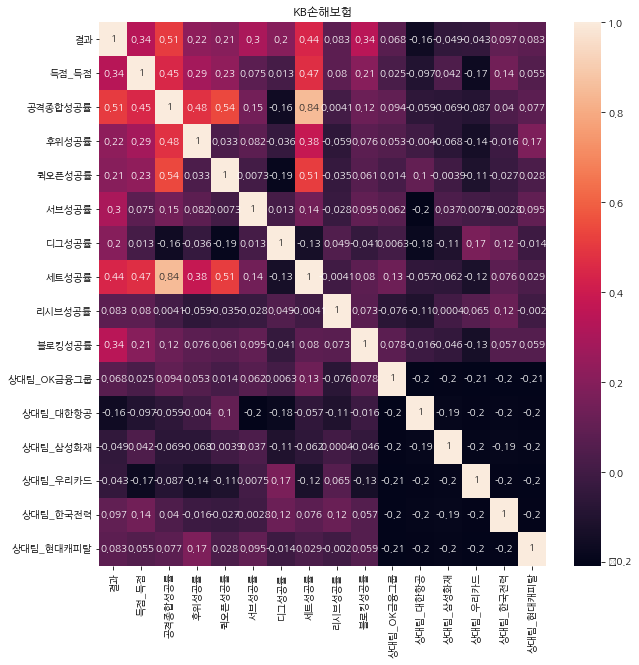

In [44]:
plt.rc('font', family='NanumGothic')
plt.figure(figsize=(10,10))
plt.title('KB손해보험')
_= sns.heatmap(KB손해보험.corr(), annot=True)

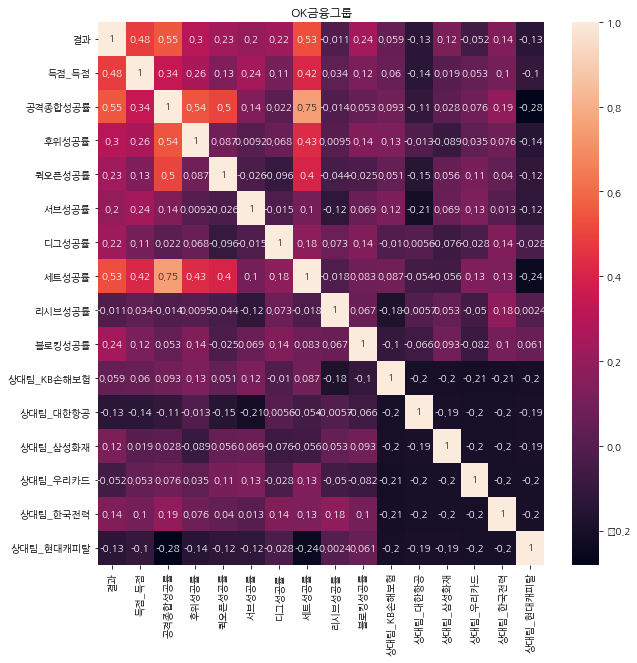

In [12]:
plt.figure(figsize=(10,10))

plt.title('OK금융그룹')
_= sns.heatmap(OK금융그룹.corr(), annot=True)

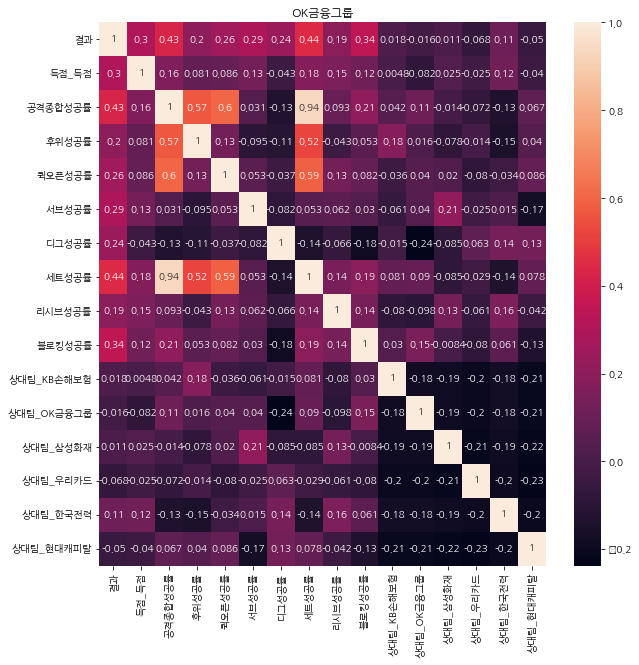

In [13]:
plt.figure(figsize=(10,10))

plt.title('OK금융그룹')
_= sns.heatmap(대한항공.corr(), annot=True)

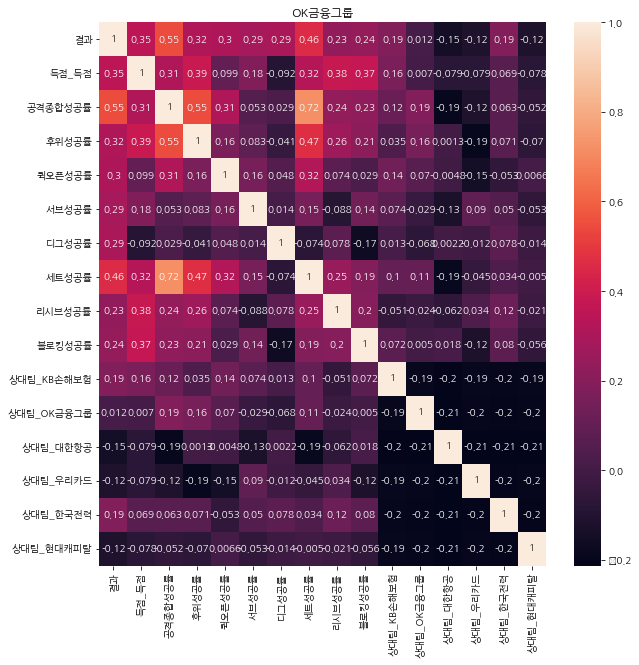

In [14]:
plt.figure(figsize=(10,10))

plt.title('OK금융그룹')
_= sns.heatmap(삼성화재.corr(), annot=True)

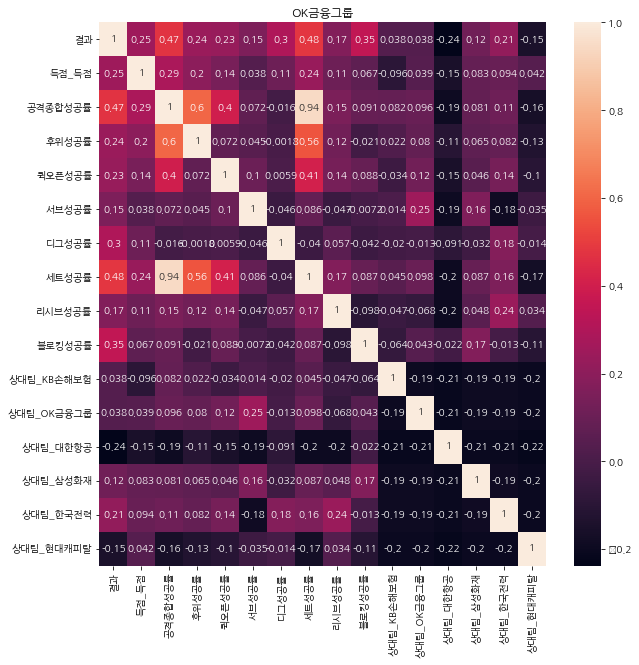

In [15]:
plt.figure(figsize=(10,10))

plt.title('OK금융그룹')
_= sns.heatmap(우리카드.corr(), annot=True)

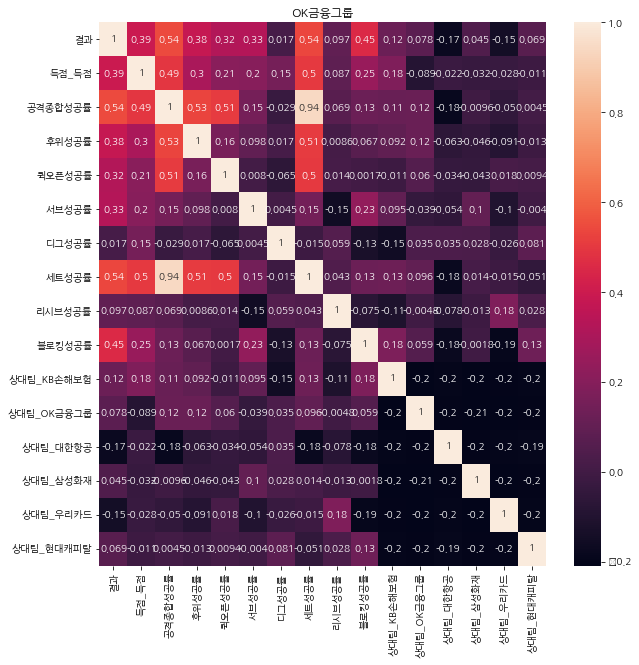

In [16]:
plt.figure(figsize=(10,10))

plt.title('OK금융그룹')
_= sns.heatmap(한국전력.corr(), annot=True)

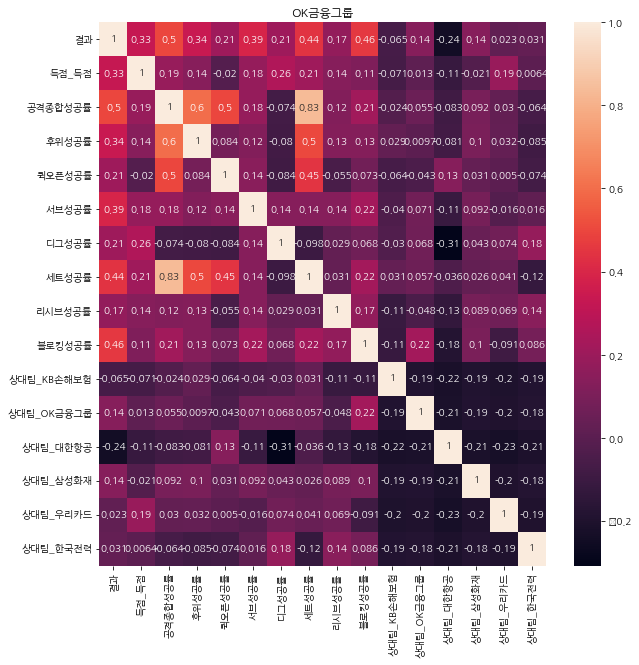

In [17]:
plt.figure(figsize=(10,10))

plt.title('OK금융그룹')
_= sns.heatmap(현대캐피탈.corr(), annot=True)

팀별 학습 진행후, 제일 좋은 모델을 기반으로
팀, 상대팀 입력
팀의 스탯은 평균값을 중심으로 min~max 범위내로 조정해서 함수 입력
상대팀과의 상성과 임의로 주어진 스탯을 중심으로 승패 계산